# Basic Information

Count Date: 2022.03.01



Format: `(open+close) =all`

Overall bug label Ratio: **2363 / 15063 = 15.68%**

| GraphDB Engine Name                                    | issue                                                        | issue+bug tag                                                   | pr                                                           | pr+bug tag                                                      | bug label ratio  |
| ------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | ------ |
| [Neo4j](https://github.com/neo4j/neo4j)                | [231+2784=3015](https://github.com/neo4j/neo4j/issues?q=is%3Aissue+created%3A%3C2021-12-31) | [64+856=920](https://github.com/neo4j/neo4j/issues?q=is%3Aissue+created%3A%3C2021-12-31+label%3Abug) | [1+9644=9645](https://github.com/neo4j/neo4j/pulls?q=is%3Apr+created%3A<2021-12-31) | [0+937=937](https://github.com/neo4j/neo4j/pulls?q=is%3Apr+created%3A%3C2021-12-31+label%3Abug) | 14.66% |
| [RedisGraph](https://github.com/RedisGraph/RedisGraph) | [168+580=748](https://github.com/RedisGraph/RedisGraph/issues?q=is%3Aissue+created%3A%3C2021-12-31) | [33+185=218](https://github.com/RedisGraph/RedisGraph/issues?q=is%3Aissue+created%3A%3C2021-12-31+label%3Abug) | [46+1292=1338](https://github.com/RedisGraph/RedisGraph/pulls?q=is%3Apr+created%3A%3C2021-12-31) | [9+259=268](https://github.com/RedisGraph/RedisGraph/pulls?q=is%3Apr+created%3A%3C2021-12-31+label%3Abug) | 23.29% |
| [Memgraph](https://github.com/memgraph/memgraph)       | [8+8=16](https://github.com/memgraph/memgraph/issues?q=is%3Aissue+created%3A%3C2021-12-31) | [2+3=5](https://github.com/memgraph/memgraph/issues?q=is%3Aissue+created%3A%3C2021-12-31+label%3Abug) | [3+298=301](https://github.com/memgraph/memgraph/pulls?q=is%3Apr+created%3A%3C2021-12-31) | [0+15=15](https://github.com/memgraph/memgraph/pulls?q=is%3Apr+created%3A%3C2021-12-31+label%3Abug) | 6.30%  |



# Please add your Github Token to run the following code

In [4]:
GLOBALTOKEN = ""  # ADD YOUR TOKEN HERE !!

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
plt.style.use('seaborn-paper')
tex_fonts = {
    "font.family": "Times New Roman",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "font.weight":"bold"
}
plt.rcParams.update(tex_fonts)
width = 241.14749
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim


In [6]:
import requests
import logging
import pandas as pd
import joblib
import datetime
import requests
import logging
import sys
import joblib
import os
import re
import math
import json
from tqdm import tqdm

issue_params={
    "state":"all",
    "per_page":100
}

# Github Issue Download

In [ ]:
def dumpAllIssues(reponame:str):
    # API Settings
    githuburl = f"https://api.github.com/repos/{reponame}/issues"
    token=GLOBALTOKEN
    headers={
        "Authorization":f"token {token}"
    }
    issue_params={
        "state":"all",
        "per_page":100
    }
    
    pagenum = 1    # init pagenum
    outlist = []
    while(True):
        issue_params["page"]=pagenum
        one_request_response = requests.get(githuburl,headers=headers,params=issue_params)
        json_one_request_response = one_request_response.json()
        if len(json_one_request_response) == 0:     # if no more response
            print(f"Finished, total of {reponame}: {len(outlist)}")
            outname = reponame.replace("/","_")
            joblib.dump(outlist,f"./{outname}.pkl")
            return
        outlist.extend(json_one_request_response)
        pagenum += 1

In [ ]:
# this may take some time, we've already download thesefile

In [ ]:
dumpAllIssues("Neo4j/Neo4j")
dumpAllIssues("RedisGraph/RedisGraph")
dumpAllIssues("Memgraph/Memgraph")

# Preprocess

In [7]:
def _getIssueByID(repo_name,id_number):
    """
    repo_name:
        "neo4j/neo4j"
        "RedisGraph/RedisGraph"
        "memgraph/memgraph"
    """
    token=GLOBALTOKEN
    headers={
        "Authorization":f"token {token}"
    }
    return requests.get(f"https://api.github.com/repos/{repo_name}"+f'/issues/{id_number}',headers=headers).json()

In [8]:
# _getIssueByID("RedisGraph/RedisGraph",2138)

In [9]:
def _getMonthFromDatetime(datetime:datetime.datetime):
    return int(datetime.month)
def _getYearFromDatetime(datetime:datetime.datetime):
    return int(datetime.year)
def _generateAllMonthFormOneMonth(year,month,nowyear,nowmonth):
    def pattern(y,m):
        return f"{y}-{m}"
    if year == nowyear:
        return [pattern(year,i) for i in range(month,nowmonth+1)]
    else:
        outlist = []
        for y in range(year,nowyear+1):
            if y == year:
                outlist.extend([pattern(y,i) for i in range(month,12+1)])
            elif y==nowyear:
                outlist.extend([pattern(y,i) for i in range(1,nowmonth+1)])
            else:
                outlist.extend([pattern(y,i) for i in range(1,12+1)]) 
        return outlist
def _convert_github_time_to_datetime(inputstr):
    return datetime.datetime.strptime(inputstr,"%Y-%m-%dT%H:%M:%SZ")
def _getnamefrompklfilepath(inputstr):
    return inputstr.replace("./","").split("_")[0]

In [10]:
def _filter(content_dict,issuetype=None,openstate=None,filterlabel=None,timebefore:datetime.datetime=None):
    """
        content_dict: list[githubapi_Rquest_Result.json()]
        issuetype: str, value only from {"pr", "issue", None}, default None means no filtering
        openstate: str, value only from {"open", "closed", None}, default None means no filtering
        filterlabel: str: filter label, default None means no filtering
        timebefore: datetime.datetime, filter content created_at < this time, default None means no filtering
    """
    
    # help function for filter
    def _isHaveLabel(content,labelname):
        for label in content["labels"]:
            if label["name"] == labelname:
                return True
        return False

    # help function for filter
    def _ispr(content):
        if "pull_request" in list(content.keys()):
            return True
        else:
            return False
    # help function for filter    
    def _isissue(content):
        return not _ispr(content)

    # help function for filter
    def _isbeforetimebefore(content,timebefore:datetime.datetime):
        if _convert_github_time_to_datetime(content["created_at"])<timebefore:
            return True
        else:
            return False
    
    if timebefore is not None:
        timfilterdict = []
        for i in content_dict:
            if _isbeforetimebefore(i,timebefore):
                timfilterdict.append(i)
        content_dict = timfilterdict
    if issuetype is not None:
        if issuetype == "pr":
            content_dict = list(filter(_ispr,content_dict))
        if issuetype == "issue":
            content_dict = list(filter(_isissue,content_dict))
            
    if openstate == "open" or openstate == "closed":
        content_dict = list(filter(lambda x:x["state"]==openstate,content_dict))
        
    if filterlabel is not None:
        labelfilterdict = []
        for i in content_dict:
            if _isHaveLabel(i,filterlabel):
                labelfilterdict.append(i)
        content_dict = labelfilterdict
    
    # ###  filter after 2022/1/1
    # timfilterdict = []
    # for i in content_dict:
    #     if _convert_github_time_to_datetime(i["created_at"])>=datetime.datetime(2022,1,1):
    #         timfilterdict.append(i)
    # content_dict = timfilterdict
    # ###
    
    return content_dict


def filterwrapper(issue_dump,datetimebefore):
    issue_open_bug = _filter(issue_dump,issuetype="issue",openstate="open",filterlabel="bug",timebefore=datetimebefore)
    issue_closed_bug = _filter(issue_dump,issuetype="issue",openstate="closed",filterlabel="bug",timebefore=datetimebefore)
    pr_open_bug = _filter(issue_dump,issuetype="pr",openstate="open",filterlabel="bug",timebefore=datetimebefore)
    pr_closed_bug = _filter(issue_dump,issuetype="pr",openstate="closed",filterlabel="bug",timebefore=datetimebefore)
    return issue_open_bug,issue_closed_bug,pr_open_bug,pr_closed_bug


# issue_open_bug,issue_closed_bug,pr_open_bug,pr_closed_bug = filterwrapper(issue_dump,datetime.datetime(2022,2,13))

In [11]:
namelist = ["./Neo4j_Neo4j.pkl","./RedisGraph_RedisGraph.pkl","./Memgraph_Memgraph.pkl"]

# Bug Basic Info

In [12]:
for path in namelist:
    issue_dump = joblib.load(path)
    issue_open_bug,issue_closed_bug,pr_open_bug,pr_closed_bug = filterwrapper(issue_dump,datetime.datetime(2021,12,31))
    print(f"==={path}================")
    print(f"issue_open_bug: {len(issue_open_bug)}")
    print(f"issue_closed_bug: {len(issue_closed_bug)}")
    print(f"pr_open_bug: {len(pr_open_bug)}")
    print(f"pr_closed_bug: {len(pr_closed_bug)}")

===./Neo4j_Neo4j.pkl================
issue_open_bug: 64
issue_closed_bug: 856
pr_open_bug: 0
pr_closed_bug: 938
===./RedisGraph_RedisGraph.pkl================
issue_open_bug: 33
issue_closed_bug: 185
pr_open_bug: 9
pr_closed_bug: 260
===./Memgraph_Memgraph.pkl================
issue_open_bug: 2
issue_closed_bug: 3
pr_open_bug: 0
pr_closed_bug: 15


# RQ1 What is the distribution of bugs?

In [13]:
def RQ1(dumpobject):
    """Count the number of bugs per month, not cumulative
    """
    month_dict = {}
    for item in dumpobject:
        # Get "created_at" time in each issue
        datatime_obj = datetime.datetime.strptime(item["created_at"],"%Y-%m-%dT%H:%M:%SZ")
        yearmonth_key = (_getYearFromDatetime(datatime_obj),_getMonthFromDatetime(datatime_obj))
        if yearmonth_key not in month_dict.keys():
            month_dict[yearmonth_key] = [item["number"]]
        else:
            month_dict[yearmonth_key].append(item["number"])
    return month_dict

In [14]:
def RQ1solution(namelist,RQ1_DISTINGUISH_PR_AND_ISSUE = True,RQ1_ACCUMULATION = True):
    solutiondict={}

    if RQ1_DISTINGUISH_PR_AND_ISSUE == True:
        # By db name && pr/issue
        for path in namelist:
            issue_dump = joblib.load(path)
            issue_bug = _filter(issue_dump,issuetype="issue",filterlabel="bug",timebefore=datetime.datetime(2021,12,31))
            pr_bug = _filter(issue_dump,issuetype="pr",filterlabel="bug",timebefore=datetime.datetime(2021,12,31))
            solutiondict[_getnamefrompklfilepath(path)+"_issue"] = RQ1(issue_bug)
            solutiondict[_getnamefrompklfilepath(path)+"_pr"] = RQ1(pr_bug)
    else:
        # By db name, regardless of pr/issue
        for path in namelist:
            issue_dump = joblib.load(path)
            solutiondict[_getnamefrompklfilepath(path)] = RQ1(_filter(issue_dump,filterlabel="bug",timebefore=datetime.datetime(2021,12,31)))

    mmaxdate=None
    mmindate=None
    for rowname,solution in solutiondict.items():
        _ = list(solution.keys())
        _maxdate = _[0]
        _mindate = _[-1]
        maxdate = datetime.date(_maxdate[0],_maxdate[1],1)
        mindate = datetime.date(_mindate[0],_mindate[1],1)
        print(f"{rowname}: max:{_maxdate},min{_mindate}")
        if mmaxdate==None: mmaxdate = maxdate;
        if maxdate>mmaxdate: mmaxdate = maxdate;
        if mmindate==None: mmindate = mindate;
        if mindate<mmindate: mmindate = mindate;       
    print(f"TOTAL DATE max:{mmaxdate},min:{mmindate}")

    # merge time keys
    output_pd_frame = pd.DataFrame(
        columns=list(solutiondict.keys()), # Column name of the final statistics table
        index=_generateAllMonthFormOneMonth(mmindate.year,mmindate.month,mmaxdate.year,mmaxdate.month)
    ).fillna(0)

    for rowname,solution in solutiondict.items():
        for time,numberidlist in solution.items():
            output_pd_frame.loc[f"{time[0]}-{time[1]}",rowname] = len(numberidlist)

    if RQ1_ACCUMULATION == True:
        # Do cumulative operations on the entire table
        for i in range(len(output_pd_frame)):
            if i == 0:
                continue
            else:
                output_pd_frame.iloc[i] = output_pd_frame.iloc[i] + output_pd_frame.iloc[i-1]
    return output_pd_frame

In [15]:
#RQ1_DISTINGUISH_PR_AND_ISSUE
#RQ1_ACCUMULATION: Whether to totalize the results
rq1solution_pd = RQ1solution(namelist,RQ1_DISTINGUISH_PR_AND_ISSUE = True,RQ1_ACCUMULATION = True)

Neo4j_issue: max:(2021, 12),min(2012, 11)
Neo4j_pr: max:(2018, 5),min(2013, 4)
RedisGraph_issue: max:(2021, 12),min(2018, 5)
RedisGraph_pr: max:(2021, 12),min(2018, 7)
Memgraph_issue: max:(2021, 12),min(2021, 10)
Memgraph_pr: max:(2021, 10),min(2020, 10)
TOTAL DATE max:2021-12-01,min:2012-11-01


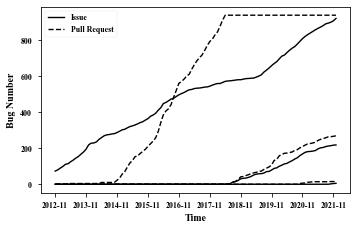

In [16]:
plt.figure(figsize=set_size(400))
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Bug Number',fontweight='bold')
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
ax.plot(rq1solution_pd['Neo4j_issue'], color = 'k', label = 'Neo4j_issue', linestyle = '-')
ax.plot(rq1solution_pd['Neo4j_pr'], color = 'k', label = 'Neo4j_pr', linestyle = '--')
ax.plot(rq1solution_pd['RedisGraph_issue'], color = 'k', label = 'Neo4j_issue', linestyle = '-')
ax.plot(rq1solution_pd['RedisGraph_pr'], color = 'k', label = 'Neo4j_pr', linestyle = '--')
ax.plot(rq1solution_pd['Memgraph_issue'], color = 'k', label = 'Neo4j_issue', linestyle = '-')
ax.plot(rq1solution_pd['Memgraph_pr'], color = 'k', label = 'Neo4j_pr', linestyle = '--')
custom_lines = [Line2D([0], [0], color="black", linestyle = '-'),
                Line2D([0], [0], color="black", linestyle = '--')]
ax.legend(custom_lines,['Issue','Pull Request'])
plt.savefig('RQ1.svg', format='svg', bbox_inches='tight')
plt.show()

For the full image please refer to our paper

In [17]:
# def RQ1.5(dumpobject):
#     month_dict = {}
#     for item in dumpobject:
#         datatime_obj = datetime.datetime.strptime(item["created_at"],"%Y-%m-%dT%H:%M:%SZ")
#         yearmonth_key = (_getYearFromDatetime(datatime_obj),_getMonthFromDatetime(datatime_obj))
#         if yearmonth_key not in month_dict.keys():
#             month_dict[yearmonth_key] = [item["number"]]
#         else:
#             month_dict[yearmonth_key].append(item["number"])
#     return month_dict

In [18]:
# for path in namelist:
#     issue_dump = joblib.load(path)
    
#     print(path,
#           len(_filter(issue_dump,timebefore=datetime.datetime(2021,12,31))),
#           len(_filter(issue_dump,issuetype="issue",timebefore=datetime.datetime(2021,12,31))),
#           len(_filter(issue_dump,issuetype="pr",timebefore=datetime.datetime(2021,12,31)))
#          )

# RQ2: How long do bugs live?

In [19]:
def countfrom0to100(inputarr):
    maxnum = max(inputarr)
    outlist = [0 for i in range(maxnum+1)]
    for i in inputarr:
        outlist[i] += 1 
    for idx in range(len(outlist)):
        if idx == 0:
            continue
        else:
            outlist[idx] += outlist[idx-1]
    return maxnum, [100*i/len(inputarr)  for i in outlist]
# countfrom0to100(outdict['./neo4j_neo4j.pkl'])

In [20]:
def RQ2():
    avg_date_list = []
    outdict = {}
    outdatedict = {}
    for path in namelist:
        issue_dump = joblib.load(path)
        issue_closed_bug = _filter(issue_dump,issuetype="issue",openstate="closed",filterlabel="bug",timebefore=datetime.datetime(2021,12,31))
        outlist = []
        for bug in issue_closed_bug:
            createtime = _convert_github_time_to_datetime(bug["created_at"])
            closetime = _convert_github_time_to_datetime(bug["closed_at"])
            outlist.append((closetime-createtime).days)
            if (closetime-createtime).days>2000:
                print(f"more than 2000 days: time:{(closetime-createtime).days}, {bug['url']}")
        print(f"name:{path}   avg fix time: {math.ceil(sum(outlist)/len(outlist))} days   total count(issue+bug+closed): {len(outlist)}")
        avg_date_list.append(math.ceil(sum(outlist)/len(outlist)))
        maxdate,risinglist = countfrom0to100(outlist)     # process them from 0% to 100%
        
        outdict[path] = risinglist
        outdatedict[path] = maxdate
    maxdate=max([v for v in outdatedict.values()])
    output_pd_frame = pd.DataFrame(
            columns=list(outdatedict.keys()), # column name of final table
            index= range(maxdate+1)
        ).fillna(100.00)

    for k,v in outdict.items():
        for idx,percentage in enumerate(v):
            output_pd_frame.at[idx,k] = percentage
    return output_pd_frame, avg_date_list

In [21]:
RQ2solution,avg_date_list = RQ2()
print(f"max date {len(RQ2solution)}")

more than 2000 days: time:2483, https://api.github.com/repos/neo4j/neo4j/issues/544
more than 2000 days: time:2176, https://api.github.com/repos/neo4j/neo4j/issues/268
more than 2000 days: time:2583, https://api.github.com/repos/neo4j/neo4j/issues/121
more than 2000 days: time:2186, https://api.github.com/repos/neo4j/neo4j/issues/63
name:./Neo4j_Neo4j.pkl   avg fix time: 287 days   total count(issue+bug+closed): 856
name:./RedisGraph_RedisGraph.pkl   avg fix time: 92 days   total count(issue+bug+closed): 185
name:./Memgraph_Memgraph.pkl   avg fix time: 18 days   total count(issue+bug+closed): 3
max date 2584


In [22]:
RQ2solution.to_csv("./RQ2.csv")

In [23]:
RQ2solution

,./Neo4j_Neo4j.pkl,./RedisGraph_RedisGraph.pkl,./Memgraph_Memgraph.pkl
0,4.322430,12.432432,0.000000
1,6.542056,21.081081,66.666667
2,8.528037,29.189189,66.666667
3,10.981308,32.972973,66.666667
4,13.317757,38.378378,66.666667
...,...,...,...
2579,99.883178,100.000000,100.000000
2580,99.883178,100.000000,100.000000
2581,99.883178,100.000000,100.000000
2582,99.883178,100.000000,100.000000


70.5607476635514
72.97297297297297
66.66666666666667


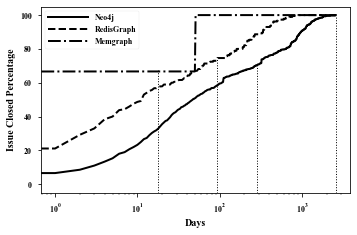

In [24]:
plt.figure(figsize=set_size(400))
plt.xlabel('Days',fontweight='bold')
plt.ylabel('Issue Closed Percentage',fontweight='bold')
ax=plt.gca()

ax.plot(RQ2solution['./Neo4j_Neo4j.pkl'], color = 'k', label = 'Neo4j', linestyle = '-', lw=2)
ax.plot(RQ2solution['./RedisGraph_RedisGraph.pkl'], color = 'k', label = 'RedisGraph', linestyle = '--', lw=2)
ax.plot(RQ2solution['./Memgraph_Memgraph.pkl'], color = 'k', label = 'Memgraph', linestyle = '-.', lw=2)

#vertical line
for i in range(len(namelist)):
    print(RQ2solution[namelist[i]][avg_date_list[i]])
    plt.axvline(avg_date_list[i],0,RQ2solution[namelist[i]][avg_date_list[i]]/100-0.01, c="black", ls=":", lw=1)
plt.axvline(len(RQ2solution),0,0.95, c="black", ls=":", lw=1)
# axis of vertical line
avg_date_list.append(len(RQ2solution))

# log scale
plt.xscale('log') 
ax.legend(loc="upper left",handlelength=5)
plt.savefig('RQ2.svg', format='svg', bbox_inches='tight')

In [25]:
RQ2solution

,./Neo4j_Neo4j.pkl,./RedisGraph_RedisGraph.pkl,./Memgraph_Memgraph.pkl
0,4.322430,12.432432,0.000000
1,6.542056,21.081081,66.666667
2,8.528037,29.189189,66.666667
3,10.981308,32.972973,66.666667
4,13.317757,38.378378,66.666667
...,...,...,...
2579,99.883178,100.000000,100.000000
2580,99.883178,100.000000,100.000000
2581,99.883178,100.000000,100.000000
2582,99.883178,100.000000,100.000000


# RQ3 code changes

In [26]:
namelist

['./Neo4j_Neo4j.pkl', './RedisGraph_RedisGraph.pkl', './Memgraph_Memgraph.pkl']

In [27]:
def _getDiffContentListFromGithub(pr_url):
    headers={
        "Authorization":f"token {GLOBALTOKEN}",
        "Accept":"application/vnd.github.v3.diff"
    }
    diff_text = requests.get(pr_url,headers=headers).text
    return diff_text
def _getDiffFileNameFromline(strinput):
    difflist = strinput.split(" ")
    if len(difflist) == 4:
        return difflist[-1].lstrip("b")     
    else:
        newdifflist = difflist[2:]
        halflen = int(len(newdifflist)/2)
        return " ".join(newdifflist[halflen:]).lstrip("b")

def getStatisticalResultFromGithubURL(diffurl):
    difftext = _getDiffContentListFromGithub(diffurl)
    difflist = difftext.split("\ndiff ")
    for i in range(len(difflist)):
        if i == 0:
            continue
        else:
            difflist[i] = f"diff {difflist[i]}"
    diff_result_dict = {} # diff file: (add,del)
    for onediff in difflist:
        onediffdict = onediff.split("\n")
        addnum = 0
        delnum = 0
        filename = None
        for line in onediffdict:
            if line[0:4]=="diff":
                filename = _getDiffFileNameFromline(line)
            if len(line)==0:
                continue
            elif len(line)==1:
                if line[0] == "+": addnum+=1
                elif line[0] == "-": delnum-=1
                else: continue
            else:
                if line[0] == "+" and line[1] != "+":
                    addnum += 1
                if line[0] == "-" and line[1] != "-":
                    delnum += 1
        diff_result_dict[filename] = [addnum,delnum]
    return diff_result_dict

### THIS MAY TAKE SOME TIME due to online fetch "diff data of each pr"

make sure you have enter your github personal access token

In [ ]:
RQ3dict = {}
for name in namelist:
    issue_dump = joblib.load(name)
    filercontent = _filter(issue_dump,issuetype="pr",filterlabel="bug",timebefore=datetime.datetime(2021,12,31))
    resultlist = []
    print(f"Start RQ3: {name}")
    pbar = tqdm(total=len(filercontent))
    for onepr in filercontent:
        diffurl = onepr["pull_request"]["url"]
        prnumber = onepr["number"]
        diff_stat_result = None
        try:
            diff_stat_result = getStatisticalResultFromGithubURL(diffurl)
        except:
            humandiffurl = onepr["pull_request"]["diff_url"]
            print(f"UNSOLVABLE: {name}:pr number: {prnumber}, diff url: {humandiffurl} ,pr url:{diffurl}; add manually")
        resultlist.append({
            "number":prnumber,
            "diffresult":diff_stat_result
        })
        pbar.update(1)
    pbar.close()
    RQ3dict[name]=resultlist

In [ ]:
with open('RQ3.json', 'w') as fp:
    json.dump(RQ3dict, fp)

In [28]:
RQ3json = json.load(open("RQ3.json"))

In [29]:
for k,vlist in RQ3json.items():
    numlist = []
    addlist = []
    dellist = []
    reversedict = {}
    for onepr in vlist:
        keylist = onepr['diffresult'].keys()
        for key in keylist:
            if key not in reversedict.keys():
                reversedict[key] = 0
            else:
                reversedict[key] += 1
            addlist.append(onepr['diffresult'][key][0])
            dellist.append(onepr['diffresult'][key][1])
        numlist.append(len(keylist))
        
    print(f"{k}: avg file change:{sum(numlist)/len(numlist)}, avg lines add: {sum(addlist)/len(addlist)}, avg lines del: {sum(dellist)/len(dellist)}")
    a = sorted(reversedict.items(), key=lambda x: x[1], reverse=True)
    for i in range(10):
        print(f"     {a[i]}")


./memgraph_memgraph.pkl: avg file change:4.866666666666666, avg lines add: 8.095890410958905, avg lines del: 5.095890410958904
     ('/src/storage/v2/storage.cpp', 2)
     ('/CHANGELOG.md', 1)
     ('/src/storage/v2/replication/replication_server.cpp', 1)
     ('/src/storage/v2/replication/replication_client.cpp', 1)
     ('/src/query/interpreter.cpp', 1)
     ('/.github/workflows/daily_benchmark.yaml', 0)
     ('/src/query/plan/preprocess.cpp', 0)
     ('/src/auth/reference_modules/example.py', 0)
     ('/src/auth/reference_modules/ldap.py', 0)
     ('/tests/integration/ldap/runner.py', 0)
./neo4j_neo4j.pkl: avg file change:13.1727078891258, avg lines add: 45.7195694399482, avg lines del: 12.36095823891227
     ('/community/cypher/cypher/src/test/scala/org/neo4j/cypher/MatchAcceptanceTest.scala', 28)
     ('/enterprise/cypher/acceptance-spec-suite/src/test/resources/blacklists/cost-compiled.txt', 25)
     ('/community/kernel/src/main/java/org/neo4j/graphdb/factory/GraphDatabaseSetting

# RQ4 Cypher number in issue
In `closed issue` and `bug` label

 - ./memgraph_memgraph.pkl have <font color=red>3/5</font>  cypher query in bug report

 - ./neo4j_neo4j.pkl have <font color=red>358/920</font>  cypher query in bug report

 - ./RedisGraph_RedisGraph.pkl have <font color=red>133/218</font>  cypher query in bug report


In [30]:
def isHaveCypher(inputstr:str):
    # Because there are some keywords that are too common in English (e.g. "and", "or", "is", "not")
    # We selected only some of the Cypher keywords
    inputstr_lower = inputstr.lower()
    CPYHER_KEYWD = ['match', 'optional', 'where', 'start', 'aggregation', 'load', 'create', 'merge', 'set', 'delete', 'remove', 'foreach', 'unique', 'return', 'order by', 'limit', 'skip', 'with', 'unwind', 'union', 'call', 'contains', 'distinct']
    counter = 0
    for keywd in CPYHER_KEYWD:
        if keywd in inputstr_lower:
            counter += 1
    if counter >= 2:
        return True
    else:
        return False

In [31]:
def countPropotionLessThan(inputlist,number):
    counter = 0
    for i in inputlist:
        if i <= number:
            counter += 1
    return f"{100*counter/len(inputlist) }%"
def RQ4closed(isFilterMarkdownCodeSnippet = True):
    overallhavetime=[]
    overalldonothavetime=[]
    for name in namelist:
        havetime = []
        donothavetime = []
        issue_dump = joblib.load(name)
        filercontent = _filter(issue_dump,issuetype="issue",filterlabel="bug",openstate="closed",timebefore=datetime.datetime(2021,12,31))
        lenof_filtercontent = len(filercontent)
        mdcounter = 0
        counter = 0
        for item in filercontent:
            # ignore blank content
            if item["body"] == None:
                continue
                
            # filter Markdown ``` content
            if isFilterMarkdownCodeSnippet:
                codelist = re.findall(r"```[\s\S]*?```", item["body"])
                if codelist != None:
                    mdcounter+=1
            else:
                codelist =item["body"]
                print(codelist)
            
            flag=False
            createtime = _convert_github_time_to_datetime(item["created_at"])
            closetime = _convert_github_time_to_datetime(item["closed_at"])
            days = (closetime-createtime).days
            for code in codelist:
                if isHaveCypher(code):
                    flag=True
            if flag:
                havetime.append(days)
                overallhavetime.append(days)
                counter +=1
            else:
                donothavetime.append(days)
                overalldonothavetime.append(days)
        print(f"{name} have Cypher:{counter}/Markdown:{mdcounter}/total:{lenof_filtercontent} cypher query in bug report")
        print(f"avg time for issue with cypher:{sum(havetime)/len(havetime)}, avg time for issue without cypher:{sum(donothavetime)/len(donothavetime)}")
        print(pd.DataFrame(havetime).describe())
        print(pd.DataFrame(donothavetime).describe())
    print("===========================\nOverall status")
    print(pd.DataFrame(overallhavetime).describe())
    print(pd.DataFrame(overalldonothavetime).describe())


In [32]:
RQ4closed()

./Neo4j_Neo4j.pkl have Cypher:340/Markdown:856/total:856 cypher query in bug report
avg time for issue with cypher:228.45294117647057, avg time for issue without cypher:325.4748062015504
                 0
count   340.000000
mean    228.452941
std     386.565477
min       0.000000
25%      11.000000
50%      33.500000
75%     260.250000
max    1973.000000
                 0
count   516.000000
mean    325.474806
std     476.614180
min       0.000000
25%      12.000000
50%      63.000000
75%     488.500000
max    2583.000000
./RedisGraph_RedisGraph.pkl have Cypher:112/Markdown:184/total:185 cypher query in bug report
avg time for issue with cypher:84.83928571428571, avg time for issue without cypher:104.27777777777777
                0
count  112.000000
mean    84.839286
std    157.820548
min      0.000000
25%      2.000000
50%     12.000000
75%     78.750000
max    902.000000
                0
count   72.000000
mean   104.277778
std    166.775148
min      0.000000
25%      2.000000
50% 

In [33]:
def RQ4(isFilterMarkdownCodeSnippet = True):
    for name in namelist:
        issue_dump = joblib.load(name)
        filercontent = _filter(issue_dump,issuetype="issue",filterlabel="bug",timebefore=datetime.datetime(2021,12,31))
        lenof_filtercontent = len(filercontent)
        mdcounter = 0
        counter = 0
        for item in filercontent:
            # ignore blank content
            if item["body"] == None:
                continue
                
            # filter Markdown ``` content
            if isFilterMarkdownCodeSnippet:
                codelist = re.findall(r"```[\s\S]*?```", item["body"])
                if codelist != None:
                    mdcounter+=1
            else:
                codelist =item["body"]
                print(codelist)
            
            flag=False
            for code in codelist:
                if isHaveCypher(code):
                    flag=True
            if flag:
                counter +=1
        print(f"{name} have Cypher:{counter}/Markdown:{mdcounter}/total:{lenof_filtercontent} cypher query in bug report")

In [34]:
RQ4()

./Neo4j_Neo4j.pkl have Cypher:358/Markdown:920/total:920 cypher query in bug report
./RedisGraph_RedisGraph.pkl have Cypher:133/Markdown:217/total:218 cypher query in bug report
./Memgraph_Memgraph.pkl have Cypher:3/Markdown:5/total:5 cypher query in bug report
